# Deep Learning
# DL07 Clasificación de un Sonar




## <font color='blue'>**Clasificación binaria de un Sonar**</font>
<p style='text-align: justify;'>

El conjunto de datos que usaremos en esta clase práctica es la base de datos de un sonar. La base de datos describe los retornos del sonar rebotando en diferentes superficies. Las 60 variables de entrada son la fuerza de los rebotes con diferentes ángulos. Es un problema de clasificación binaria que requiere un modelo para diferenciar si el material que sensa el sonar son rocas o metal. El conjunto tiene alta dimensionalidad, pero poca data.

De la base de datos se observa que todas las variables son continuas y generalmente están en el rango de 0 a 1. La variable de salida es un string "M" para metal y "R" para roca, que deberá convertirse (codificarse) en números enteros 1 y 0. El conjunto de datos contiene 208 observaciones.

La idea de usar esta base de datos, es que es un problema conocido y que ha sido estudiado. Esto significa que tenemos una idea de la habilidad esperada del modelo. Mediante la validación cruzada, una red neuronal debería poder alcanzar un rendimiento de aproximadamente el 84% con un límite superior en la precisión para modelos personalizados en aproximadamente el 88%.

### Clasificación binaria del Sonar

Comenzaremos importando todas las clases y funciones que necesitaremos. Además, podemos inicializar el generador de números aleatorios seed para asegurarnos de que siempre obtengamos los mismos resultados al ejecutar este código. Esto ayudará si estamos depurando.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ahora podemos cargar la base de datos utilizando Pandas y separar en columnas en 60 variables de entrada (X) y 1 variable de salida (Y). Utilizamos la librería Pandas para cargar los datos porque maneja caracteres (la variable de salida), mientras que intentar cargar los datos directamente usando, por ejemplo, NumPy sería más difícil.

La variable de salida es una letra (caracter, "M" o "R"), debemos convertirla a valores enteros 0 y 1. Podemos hacer esto usando la clase LabelEncoder() de Scikit-Learn. Como habíamos visto en las prácticas anteriores, esta función realiza la codificación mediante la función encoder.fit() y luego aplica la nueva codificación en la variable de salida usando encoder.transform().  

In [ ]:
## base de datos
import pandas as pd
from sklearn.preprocessing import LabelEncoder
path = '/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 7/'
dataframe = pd.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entrada y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y   #codificada con indices enteros 0, 1
print("Codificando la salida:")
print(dummy_y)
print("Forma de los datos de entrada:")
print("ejemplos, atributos")
print(X.shape)
print("Forma de las etiquetas:")
print(Y.shape)

Codificando la salida:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Forma de los datos de entrada:
ejemplos, atributos
(208, 60)
Forma de las etiquetas:
(208,)



Vamos a crear nuestro modelo y usaremos Scikit-Learn para evaluar el modelo utilizando la validación cruzada de k-fold. Para usar los modelos Keras con Scikit-Learn, debemos usar el contenedor KerasClassifier, de la misma forma que en la práctica anterior.

La clase KerasClassifier toma una función que crea y devuelve nuestro modelo de red neuronal. Se deben ingresar los argumentos para pasar a la función de ajuste `fit()`, como el número de épocas y el tamaño del lote. Vamos a empezar definiendo la función que crea nuestro modelo, llamada `sonar_model()`. Nuestro modelo tendrá una única capa oculta totalmente conectada con el mismo número de neuronas que las variables de entrada. Luego podemos crear otras redes neuronales para analizar el problema.

Los pesos se inicializan utilizando un pequeño número aleatorio gaussiano ("normal"). Se utiliza la función de activación de rectificación (ReLU). La capa de salida contiene una sola neurona para hacer predicciones (**clasificación binaria**). Se utiliza la función de activación sigmoide para producir una salida de probabilidad en el rango de 0 a 1 que se puede convertir fácil y automáticamente a valores de clase nítidos. Además, se usa la función de pérdida logarítmica (**binary crossentropy**) durante el entrenamiento, que es la función de pérdida preferida para los problemas de clasificación binaria. El modelo también utiliza como optimizador el algoritmo Adam para el descenso del gradiente y las métricas de accuracy se recopilarán cuando se entrene el modelo.

Ahora es el momento de evaluar este modelo utilizando una validación cruzada con Scikit-Learn. Le pasamos el número de épocas de entrenamiento y el batch_size al KerasClassifier. Se utiliza un k-fold de 10 veces para la validación cruzada.

### Código completo para revisión

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Establecer una semilla para reproducibilidad
seed = 7
np.random.seed(seed)

# Cargar la base de datos
path = '/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 7/'
dataframe = pd.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values

# Separar las entradas y salidas
X = dataset[:, 0:60].astype(float)
Y = dataset[:, 60]

# Codificar las etiquetas categóricas a números
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Función para crear y compilar el modelo
def sonar_model():
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Definir la validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = []

fold_number = 1
for train, test in kfold.split(X, encoded_Y):
    model = sonar_model()
    model.fit(X[train], encoded_Y[train], epochs=100, batch_size=5, verbose=0)
    _, accuracy = model.evaluate(X[test], encoded_Y[test], verbose=0)
    scores.append(accuracy * 100)

    # Imprimir precisión para este pliegue
    print("Fold %d - Accuracy: %.2f%%" % (fold_number, accuracy * 100))
    fold_number += 1

# Resultados finales
print("\nOverall Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Accuracy: 85.71%
Fold 2 - Accuracy: 88.10%
Fold 3 - Accuracy: 85.71%
Fold 4 - Accuracy: 80.49%
Fold 5 - Accuracy: 78.05%

Overall Accuracy: 83.61% (+/- 3.73%)


### Mejorar el rendimiento con el procesamiento de los datos

Es una buena práctica procesarr sus datos antes de generar el modelo de red. Un esquema de procesamiento de datos para construir modelos de redes neuronales es la estandarización (normalización). Aquí es donde los datos se reajustan de manera tal que el valor medio para cada atributo es 0 y la desviación estándar es 1.

Podemos usar Scikit-Learn para realizar la estandarización de nuestra base de datos de Sonar utilizando la clase `StandardScaler`. En lugar de realizar la estandarización en todo el conjunto de datos, se realiza solo a los datos de entrenamiento durante la ejecución del la validación cruzada `k-fold`. Así evalua el modelo con datos no vistos. Podemos lograr esto en Scikit-Learn usando una clase Pipeline. Pipeline ejecuta uno o más modelos dentro de un paso del procedimiento de validación cruzada. Aquí, podemos definir un pipeline con el `StandardScaler` seguido por nuestro modelo de red neuronal.

### Sintonización de neuronas y capas en el modelo

Hay muchas cosas que sintonizar en una red neuronal, como la inicialización del peso, las funciones de activación, el procedimiento de optimización, etc. Un aspecto que puede tener un efecto de gran tamaño es la estructura de la red en sí misma, llamada topología de la red. Revisemos dos experimentos sobre la estructura de la red: hacerla más pequeña y hacerla más grande. Estos son buenos experimentos para cuando desee sintonizar una red neuronal.

### Evaluar una red más pequeña

Se sospecha que hay mucha redundancia en las variables de entrada para este problema. Los datos describen la misma señal desde diferentes ángulos. Quizás algunos de esos ángulos sean más relevantes que otros. Podemos forzar un tipo de extracción de características por parte de la red al restringir el espacio de representación en la primera capa oculta.

En este experimento tomamos nuestro modelo de referencia con 60 neuronas en la capa oculta y lo reducimos a la mitad a 30. Esto presionará a la red durante el entrenamiento para seleccionar la estructura más importante en los datos de entrada para modelar. También estandarizaremos los datos como en el experimento anterior con la preparación de datos e intentaremos aprovechar el pequeño aumento en el rendimiento.

## <font color='green'>**Actividad 1**</font>

Evaluar una red mas pequeña:

1. Normalice la data aplicando algunos de los metodos de normalización proporcionado por `sklearn.preprocessing: Preprocessing and Normalization`.

2. Proponga una red de una capa pero con menos nodos. Por ejemplo 30.

3. Compare los resultados respecto del modelo anterior. Genere una gráfica `train`, `val` v/s `epochs`.

In [ ]:
# El codigo Aqui
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)

def sonar_model():
    model = Sequential()
    model.add(Dense(30, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = []

fold_number = 1
for train, test in kfold.split(scaled_X, encoded_Y):
    model = sonar_model()
    model.fit(scaled_X[train], encoded_Y[train], epochs=100, batch_size=5, verbose=0)
    _, accuracy = model.evaluate(scaled_X[test], encoded_Y[test], verbose=0)
    scores.append(accuracy * 100)

    # Imprimir precisión para este pliegue
    print("Fold %d - Accuracy: %.2f%%" % (fold_number, accuracy * 100))
    fold_number += 1

# Resultados finales
print("\nOverall Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Accuracy: 92.86%
Fold 2 - Accuracy: 88.10%
Fold 3 - Accuracy: 95.24%
Fold 4 - Accuracy: 82.93%
Fold 5 - Accuracy: 80.49%

Overall Accuracy: 87.92% (+/- 5.62%)


In [ ]:
# El codigo Aqui
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)

def sonar_model():
    model = Sequential()
    model.add(Dense(30, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = []

fold_number = 1
for train, test in kfold.split(scaled_X, encoded_Y):
    model = sonar_model()
    model.fit(scaled_X[train], encoded_Y[train], epochs=100, batch_size=5, verbose=0)
    _, accuracy = model.evaluate(scaled_X[test], encoded_Y[test], verbose=0)
    scores.append(accuracy * 100)

    # Imprimir precisión para este pliegue
    print("Fold %d - Accuracy: %.2f%%" % (fold_number, accuracy * 100))
    fold_number += 1

# Resultados finales
print("\nOverall Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))
#IDEA DE EXPERIMENTO: hacer un PCA a la data y comparar metricas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Accuracy: 90.48%
Fold 2 - Accuracy: 90.48%
Fold 3 - Accuracy: 92.86%
Fold 4 - Accuracy: 75.61%
Fold 5 - Accuracy: 82.93%

Overall Accuracy: 86.47% (+/- 6.38%)


Fold 6 - Accuracy: 90.48%
Fold 7 - Accuracy: 90.48%
Fold 8 - Accuracy: 90.48%
Fold 9 - Accuracy: 82.93%
Fold 10 - Accuracy: 85.37%


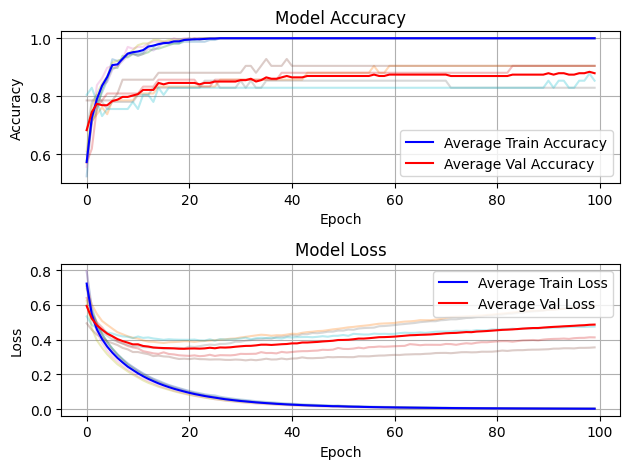


Overall Accuracy: 87.21% (+/- 5.10%)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
histories = []
for train, test in kfold.split(scaled_X, encoded_Y):  # se utiliza scaled_X
    model = sonar_model()
    history = model.fit(scaled_X[train], encoded_Y[train],
                       validation_data=(scaled_X[test], encoded_Y[test]),
                       epochs=100, batch_size=5, verbose=0)

    # lista para visualizar
    histories.append(history)

    # evaluacion del modelo
    _, accuracy = model.evaluate(scaled_X[test], encoded_Y[test], verbose=0)
    scores.append(accuracy * 100)

    # entrenamiento y validacion accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], alpha=0.3)
    plt.plot(history.history['val_accuracy'], alpha=0.3)

    # entrenamiento y validacion de loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], alpha=0.3)
    plt.plot(history.history['val_loss'], alpha=0.3)

    print("Fold %d - Accuracy: %.2f%%" % (fold_number, accuracy * 100))
    fold_number += 1

# promedio y etiquetas
plt.subplot(2, 1, 1)
mean_train_acc = np.mean([h.history['accuracy'] for h in histories], axis=0)
mean_val_acc = np.mean([h.history['val_accuracy'] for h in histories], axis=0)
plt.plot(mean_train_acc, 'b', label='Average Train Accuracy')
plt.plot(mean_val_acc, 'r', label='Average Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(2, 1, 2)
mean_train_loss = np.mean([h.history['loss'] for h in histories], axis=0)
mean_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)
plt.plot(mean_train_loss, 'b', label='Average Train Loss')
plt.plot(mean_val_loss, 'r', label='Average Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# resultados finales
print("\nOverall Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))


### Evaluar una red más grande

Una topología de red neuronal con más capas ofrece más oportunidades para que la red extraiga características claves y las combine de formas no lineales útiles. Podemos evaluar si agregar más capas a la red mejora el rendimiento haciendo otro pequeño ajuste a la función utilizada para crear nuestro modelo. Aquí, agregamos una nueva capa a la red que introduce otra capa oculta con 30 neuronas después de la primera capa oculta. Nuestra red ahora tiene la topología:

60 entradas -> [60 -> 30] -> 1 salida

La idea aquí es que a la red se le da la oportunidad de modelar todas las variables de entrada antes de ser estancada y obligada a reducir a la mitad la capacidad de representación, como lo hicimos en el experimento anterior con la red más pequeña. En lugar de exprimir la representación de las entradas en sí, tenemos una capa oculta adicional para ayudar en el proceso.

## <font color='green'>**Actividad 2**</font>

1. Normalice la data

2. Evalue una red mas grande. Agregue una capa adicional

3. Compare los resultados respecto del modelo anterior. Genere una grafica train, val v/s epochs.

In [ ]:
import tensorflow as tf
print(tf.__version__)

!pip install scikeras

2.18.0


In [ ]:
# El codigo Aqui
from sklearn.preprocessing import StandardScaler

def sonar_bigmodel():
    model = Sequential()
    model.add(Dense(90, input_dim=60, activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = []

fold_number = 1
for train, test in kfold.split(scaled_X, encoded_Y):
    model = sonar_bigmodel()
    model.fit(scaled_X[train], encoded_Y[train], epochs=100, batch_size=5, verbose=0)
    _, accuracy = model.evaluate(scaled_X[test], encoded_Y[test], verbose=0)
    scores.append(accuracy * 100)

    # precisión para este pliegue
    print("Fold %d - Accuracy: %.2f%%" % (fold_number, accuracy * 100))
    fold_number += 1

# resultados finales
print("\nOverall Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))

Fold 1 - Accuracy: 90.48%
Fold 2 - Accuracy: 90.48%
Fold 3 - Accuracy: 95.24%
Fold 4 - Accuracy: 80.49%
Fold 5 - Accuracy: 82.93%

Overall Accuracy: 87.92% (+/- 5.42%)


Comparación de los resultados respecto del modelo anterior.
grafica train, val v/s epochs.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
seed = 42
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scores_big, scores_sonar = [], []

for fold, (train_idx, test_idx) in enumerate(kfold.split(scaled_X, encoded_Y), 1):
    # entrenamiento y evaluacion de sonar_bigmodel
    bigmodel = sonar_bigmodel()
    bigmodel.fit(scaled_X[train_idx], encoded_Y[train_idx], epochs=50, batch_size=5, verbose=0)
    _, acc_big = bigmodel.evaluate(scaled_X[test_idx], encoded_Y[test_idx], verbose=0)
    scores_big.append(acc_big * 100)

    # entrenamiento y evaluación de sonar_model
    sonar = sonar_model()
    sonar.fit(scaled_X[train_idx], encoded_Y[train_idx], epochs=50, batch_size=5, verbose=0)
    _, acc_sonar = sonar.evaluate(scaled_X[test_idx], encoded_Y[test_idx], verbose=0)
    scores_sonar.append(acc_sonar * 100)

    print(f"Fold {fold} - Bigmodel: {acc_big*100:.2f}% | Sonar: {acc_sonar*100:.2f}%")

print("\nResultados Finales:")
print(f"Bigmodel: {np.mean(scores_big):.2f}% (±{np.std(scores_big):.2f})")
print(f"Sonar: {np.mean(scores_sonar):.2f}% (±{np.std(scores_sonar):.2f})")


Fold 1 - Bigmodel: 92.86% | Sonar: 88.10%
Fold 2 - Bigmodel: 78.57% | Sonar: 83.33%
Fold 3 - Bigmodel: 85.71% | Sonar: 85.71%
Fold 4 - Bigmodel: 85.37% | Sonar: 80.49%
Fold 5 - Bigmodel: 82.93% | Sonar: 87.80%

Resultados Finales:
Bigmodel: 85.09% (±4.65)
Sonar: 85.09% (±2.87)


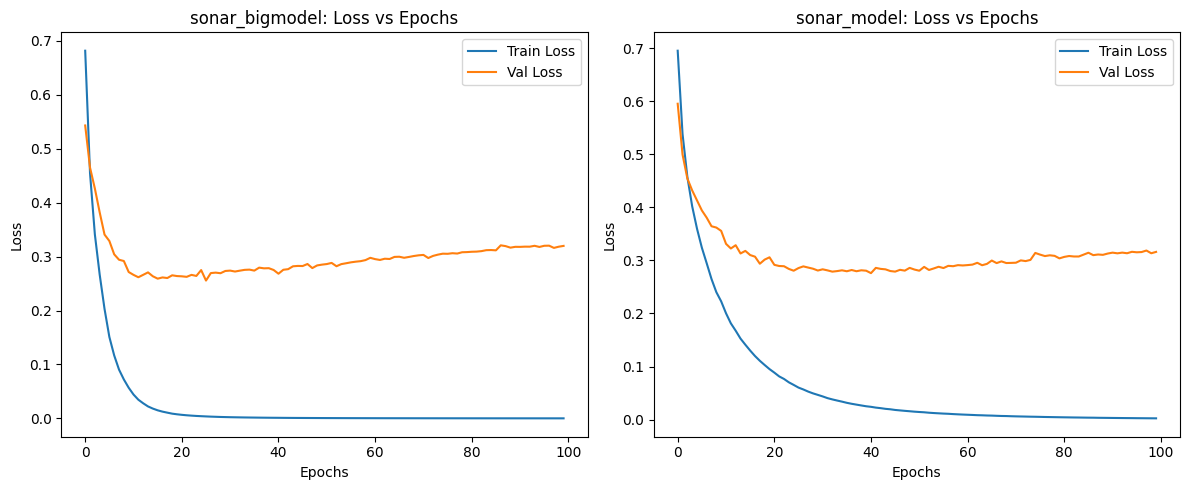

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(scaled_X, encoded_Y, test_size=0.2, random_state=seed)

# entrenar bigmodel y capturar histórico
bigmodel = sonar_bigmodel()
history_big = bigmodel.fit(X_train, y_train, epochs=100, batch_size=5,
                          validation_data=(X_val, y_val), verbose=0)

# entrenar sonar_model y capturar histórico
sonar = sonar_model()
history_sonar = sonar.fit(X_train, y_train, epochs=100, batch_size=5,
                         validation_data=(X_val, y_val), verbose=0)

# Gráfica comparativa
plt.figure(figsize=(12, 5))

# Bigmodel
plt.subplot(1, 2, 1)
plt.plot(history_big.history['loss'], label='Train Loss')
plt.plot(history_big.history['val_loss'], label='Val Loss')
plt.title('sonar_bigmodel: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Sonar_model
plt.subplot(1, 2, 2)
plt.plot(history_sonar.history['loss'], label='Train Loss')
plt.plot(history_sonar.history['val_loss'], label='Val Loss')
plt.title('sonar_model: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


<font color='green'>**Fin actividad 2**</font>

# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>
Comparativa de desempeño de los mismos modelos entrenados, pero con el dataset preprocesado con una reducción de dimensiones.

In [ ]:
# primero hay que crear funciones para compilar modelos que permitan tener dimensiones de entrada dinámica
def sonar_model_pca(n_components):
    def create_model():
        model = Sequential()
        model.add(Dense(30, input_dim=n_components, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    return create_model

def sonar_bigmodel_pca(n_components):
    def create_model():
        model = Sequential()
        model.add(Dense(90, input_dim=n_components, activation='relu'))
        model.add(Dense(30, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    return create_model

Número original de características: 60
Número después de PCA: 30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



COMPARACIÓN FINAL
sonar_model (original): 87.50% (±4.10)
sonar_model (PCA): 84.13% (±2.43)
sonar_bigmodel (original): 87.98% (±3.39)
sonar_bigmodel (PCA): 84.61% (±2.46)


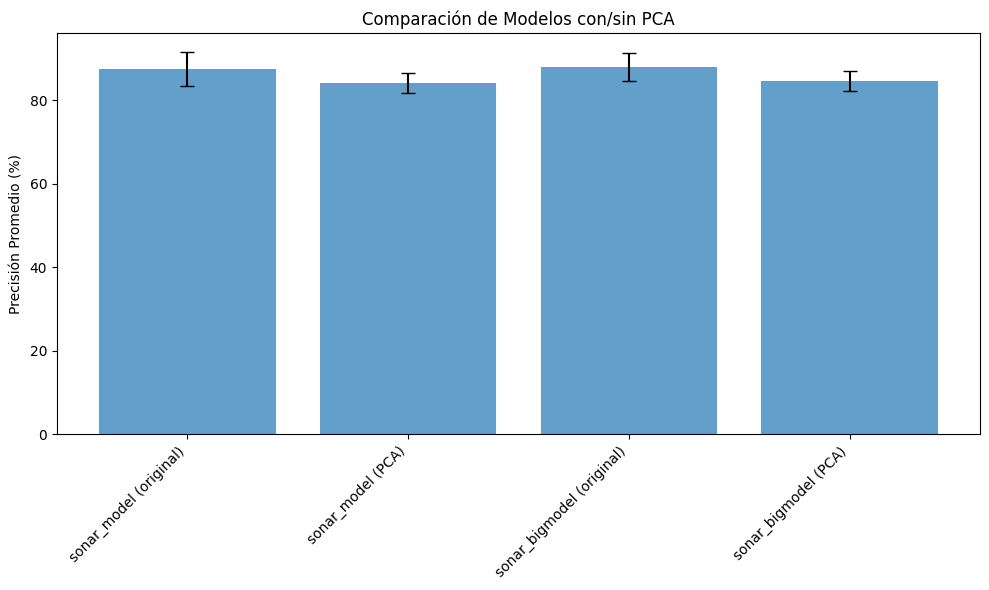

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=0.95)  # 95% de varianza
X_pca = pca.fit_transform(scaled_X)
n_components = X_pca.shape[1]

print(f"Número original de características: {scaled_X.shape[1]}")
print(f"Número después de PCA: {X_pca.shape[1]}")

# función de evaluación
def evaluar_modelo(model_func, X_data, y_data):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

    for train_idx, test_idx in kfold.split(X_data, y_data):
        model = model_func()
        model.fit(X_data[train_idx], y_data[train_idx],
                 epochs=100, batch_size=5, verbose=0)
        _, acc = model.evaluate(X_data[test_idx], y_data[test_idx], verbose=0)
        scores.append(acc * 100)

    return np.mean(scores), np.std(scores)

# evaluación de todos los escenarios
resultados = {
    'sonar_model (original)': evaluar_modelo(sonar_model, scaled_X, encoded_Y),
    'sonar_model (PCA)': evaluar_modelo(sonar_model_pca(n_components), X_pca, encoded_Y),
    'sonar_bigmodel (original)': evaluar_modelo(sonar_bigmodel, scaled_X, encoded_Y),
    'sonar_bigmodel (PCA)': evaluar_modelo(sonar_bigmodel_pca(n_components), X_pca, encoded_Y)
}

# resultados
print("\nCOMPARACIÓN FINAL")
print("=" * 40)
for nombre, (media, std) in resultados.items():
    print(f"{nombre}: {media:.2f}% (±{std:.2f})")

# Gráfico comparativo
plt.figure(figsize=(10,6))
x_pos = np.arange(len(resultados))
plt.bar(x_pos, [val[0] for val in resultados.values()],
        yerr=[val[1] for val in resultados.values()],
        capsize=5, alpha=0.7)

plt.xticks(x_pos, resultados.keys(), rotation=45, ha='right')
plt.ylabel('Precisión Promedio (%)')
plt.title('Comparación de Modelos con/sin PCA')
plt.tight_layout()
plt.show()


Los resultados indican que una reducción de la dimensionalidad puede reducir la variabilidad pero también puede reducir la precisión.

## <font color='purple' style='bold' size=3>**FIN EXPERIMENTO** </font>

# <font color='purple' style='bold' size=5>**Material Adicional** </font>
Guía completa sobre las redes neuronales multicapa, proporcionado por DataCamp
##[Perceptrones multicapa en el aprendizaje automático: Guía completa](https://www.datacamp.com/es/tutorial/multilayer-perceptrons-in-machine-learning)

## <font color='purple' style='bold' size=3>**FIN MATERIAL ADICIONAL** </font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='green'>**Redes neuronales y problemas de clasificacion.**</font>

Las redes neuronales ofrecen una amplia variedad de topologías y arquitecturas, cada una adecuada para diferentes tipos de problemas de clasificación. Aquí te presento una visión general de algunas topologías populares y sus aplicaciones:

1. Redes Neuronales Densamente Conectadas (o Fully Connected):

  a. Topología: Neuronas interconectadas en capas sucesivas.
  
  b. Aplicaciones: Problemas de clasificación tabulares, problemas de regresión.
  
  c. Ejemplo: Clasificación de clientes en distintas categorías según sus características.

2. Redes Neuronales Convolucionales (CNNs):

  a. Topología: Incluyen capas convolucionales que aplican filtros para detectar patrones espaciales.

  b. Aplicaciones: Clasificación de imágenes, detección de objetos, tratamiento de señales de tiempo-continuo.

  c. Ejemplo: Clasificación de imágenes entre gatos y perros.

3. Redes Neuronales Recurrentes (RNNs):

  a. Topología: Neuronas con conexiones recurrentes para procesar secuencias de datos.

  b. Aplicaciones: Series temporales, procesamiento de lenguaje natural, generación de texto.

  c. Ejemplo: Predicción del próximo valor en una serie temporal.

4. Autoencoders:

  a. Topología: Redes que buscan comprimir información en una representación reducida y luego reconstruirla.

  b. Aplicaciones: Reducción de dimensionalidad, detección de anomalías.

  c. Ejemplo: Detección de transacciones fraudulentas.

5. Redes Neuronales de Atención y Transformers:

  a. Topología: Utilizan mecanismos de atención para ponderar la importancia de distintas partes de la entrada.

  b. Aplicaciones: Traducción automática, generación de texto.
  
  c. Ejemplo: Modelos como BERT para clasificación de texto.

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='red'>**Redes convolucionales y clasificacion.**</font>


Usaremos el conjunto de datos MNIST, que contiene imágenes de dígitos manuscritos junto con una red convolucional para construir un clasificador:


In [ ]:
import tensorflow as tf
from tf.keras import layers, models
from tf.keras.datasets import mnist

# Cargar y preprocesar el conjunto de datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Construcción del modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilación y entrenamiento
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluación
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Accuracy: {test_acc:.4f}")
